In [ ]:
#Questions asked of this dataset in this notebook:
#When do people bike most often?
#How much money/gallons of gas are saved by bikers?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import scipy
%matplotlib inline

In [62]:
dfjan = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data Jan.csv')
dfjan.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,SLAT,SLON,ELAT,ELON,DLAT,DLON,A,ATAN,distance
count,4.093200e+04,40932.000000,40932.000000,40932.000000,40932.000000,40932.000000,40932.000000,40932.000000,39393.000000,40932.000000,40932.000000,40932.000000,40932.000000,40932.000000,40932.000000,40932.000000,4.093200e+04,40932.000000,40932.000000
mean,8.652969e+02,91.366584,42.359132,-71.087721,90.063373,42.359201,-71.087206,1047.998046,1982.697840,1.163662,0.739306,-1.240715,0.739308,-1.240706,0.000001,0.000009,2.839590e-08,0.000281,1.111684
std,1.273104e+04,58.662423,0.014163,0.024405,58.733981,0.014015,0.024361,594.272737,11.138479,0.472720,0.000247,0.000426,0.000245,0.000425,0.000224,0.000340,4.031050e-08,0.000186,0.738518
min,6.100000e+01,1.000000,42.303469,-71.166491,1.000000,42.303469,-71.166491,2.000000,1929.000000,0.000000,0.738335,-1.242090,0.738335,-1.242090,-0.001460,-0.001520,0.000000e+00,0.000000,0.000000
25%,3.510000e+02,42.000000,42.350406,-71.104412,40.000000,42.350406,-71.104079,549.000000,1977.000000,1.000000,0.739154,-1.241006,0.739154,-1.241000,-0.000129,-0.000194,5.280000e-09,0.000145,0.575000
50%,5.470000e+02,80.000000,42.359912,-71.091156,80.000000,42.359912,-71.091156,1026.000000,1986.000000,1.000000,0.739320,-1.240775,0.739320,-1.240775,0.000000,0.000000,1.370000e-08,0.000234,0.928000
75%,8.780000e+02,135.000000,42.366277,-71.067662,131.000000,42.366277,-71.066289,1662.000000,1991.000000,1.000000,0.739431,-1.240365,0.739431,-1.240341,0.000130,0.000211,3.270000e-08,0.000361,1.430000
max,2.440760e+06,232.000000,42.400877,-71.006098,232.000000,42.400877,-71.006098,1981.000000,2001.000000,2.000000,0.740035,-1.239290,0.740035,-1.239290,0.001380,0.002250,6.900000e-07,0.001660,6.580000


In [63]:
dffeb = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data Feb.csv')
dffeb.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,SLAT,SLON,ELAT,ELON,DLAT,DLON,A,ATAN,distance
count,6.281700e+04,62817.000000,62817.000000,62817.000000,62817.000000,62817.000000,62817.000000,62817.000000,59320.000000,62817.000000,62817.000000,62817.000000,62817.000000,62817.000000,62817.000000,62817.000000,6.281700e+04,62817.000000,62817.000000
mean,9.813870e+02,91.228139,42.359000,-71.087902,90.055256,42.358370,-71.086144,1025.110941,1982.906305,1.158317,0.739304,-1.240718,0.739293,-1.240687,-0.000011,0.000031,6.079444e-06,0.000310,1.228432
std,1.554940e+04,59.368664,0.014136,0.024585,59.365460,0.169575,0.284691,596.244297,11.387816,0.502517,0.000247,0.000429,0.002960,0.004969,0.002957,0.004960,1.516160e-03,0.005309,20.996080
min,6.100000e+01,1.000000,42.303469,-71.166491,1.000000,0.000000,-71.166491,1.000000,1886.000000,0.000000,0.738335,-1.242090,0.000000,-1.242090,-0.739000,-0.001900,0.000000e+00,0.000000,0.000000
25%,3.580000e+02,41.000000,42.350406,-71.104412,40.000000,42.350406,-71.104412,522.000000,1978.000000,1.000000,0.739154,-1.241006,0.739154,-1.241006,-0.000131,-0.000202,5.570000e-09,0.000149,0.591000
50%,5.660000e+02,80.000000,42.359912,-71.091156,78.000000,42.359912,-71.088220,999.000000,1987.000000,1.000000,0.739320,-1.240775,0.739320,-1.240723,0.000000,0.000000,1.420000e-08,0.000238,0.944000
75%,9.140000e+02,135.000000,42.366277,-71.068607,133.000000,42.366277,-71.066498,1635.000000,1991.000000,1.000000,0.739431,-1.240381,0.739431,-1.240344,0.000130,0.000220,3.560000e-08,0.000378,1.500000
max,2.317626e+06,232.000000,42.400877,-71.006098,232.000000,42.400877,0.000000,2003.000000,2001.000000,2.000000,0.740035,-1.239290,0.740035,0.000000,0.001390,1.240000,3.800000e-01,1.330000,5260.000000


In [64]:
dfmarch = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data March.csv')
dfmarch.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,SLAT,SLON,ELAT,ELON,DLAT,DLON,A,ATAN,distance
count,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,58429.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,62985.000000,6.298500e+04,62985.000000,62985.000000
mean,888.164214,90.406319,42.358941,-71.087795,89.905406,42.359000,-71.087353,1027.863777,1982.782095,1.134238,0.739303,-1.240716,0.739304,-1.240708,0.000001,0.000008,2.958013e-08,0.000286,1.133195
std,5282.585720,58.689924,0.014204,0.024668,59.086791,0.014117,0.024718,592.840788,11.308673,0.520078,0.000248,0.000431,0.000246,0.000431,0.000226,0.000351,4.122140e-08,0.000191,0.755810
min,61.000000,1.000000,42.303469,-71.166491,1.000000,42.303469,-71.166491,1.000000,1888.000000,0.000000,0.738335,-1.242090,0.738335,-1.242090,-0.001210,-0.002180,0.000000e+00,0.000000,0.000000
25%,353.000000,42.000000,42.350406,-71.104412,41.000000,42.350406,-71.104412,526.000000,1977.000000,1.000000,0.739154,-1.241006,0.739154,-1.241006,-0.000130,-0.000199,5.300000e-09,0.000146,0.577000
50%,569.000000,80.000000,42.359912,-71.091156,78.000000,42.359912,-71.088220,1007.000000,1986.000000,1.000000,0.739320,-1.240775,0.739320,-1.240723,0.000000,0.000000,1.390000e-08,0.000236,0.935000
75%,938.000000,130.000000,42.366277,-71.067662,131.000000,42.366277,-71.066289,1629.000000,1991.000000,1.000000,0.739431,-1.240365,0.739431,-1.240341,0.000131,0.000215,3.500000e-08,0.000374,1.480000
max,667070.000000,232.000000,42.400877,-71.006098,228.000000,42.400877,-71.006098,2004.000000,2001.000000,2.000000,0.740035,-1.239290,0.740035,-1.239290,0.001380,0.001810,7.060000e-07,0.001680,6.660000


In [65]:
dfapril= pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data April.csv')
dfapril.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,SLAT,SLON,ELAT,ELON,DLAT,DLON,A,ATAN,distance
count,9.819400e+04,98194.000000,98194.000000,98194.000000,98194.000000,98194.000000,98194.000000,98194.000000,98194.000000,98194.000000,11917.000000,11917.000000,11917.000000,11917.000000,11917.000000,11917.000000,1.191600e+04,11916.000000,11916.000000
mean,1.070922e+03,88.524553,42.358088,-71.087063,88.194605,42.358102,-71.086638,1011.586187,1981.781076,1.082256,0.739298,-1.240708,0.739295,-1.240692,-0.000002,0.000017,2.960733e-08,0.000286,1.131654
std,1.182508e+04,57.984507,0.014344,0.024607,58.182738,0.014189,0.024613,586.808393,11.668660,0.572404,0.000251,0.000432,0.000240,0.000428,0.000228,0.000349,4.146143e-08,0.000192,0.759239
min,6.100000e+01,1.000000,42.303469,-71.166491,1.000000,42.303469,-71.166491,1.000000,1888.000000,0.000000,0.738335,-1.242090,0.738335,-1.242090,-0.001210,-0.001600,0.000000e+00,0.000000,0.000000
25%,3.650000e+02,45.000000,42.349225,-71.103945,43.000000,42.349935,-71.103945,525.000000,1970.000000,1.000000,0.739146,-1.241006,0.739154,-1.240998,-0.000131,-0.000191,5.280000e-09,0.000145,0.575000
50%,6.070000e+02,75.000000,42.358155,-71.089811,75.000000,42.358155,-71.088220,988.000000,1986.000000,1.000000,0.739314,-1.240751,0.739314,-1.240723,0.000000,0.000005,1.390000e-08,0.000236,0.934500
75%,1.030000e+03,120.000000,42.365908,-71.068922,120.000000,42.365673,-71.066289,1576.000000,1991.000000,1.000000,0.739431,-1.240341,0.739420,-1.240323,0.000128,0.000221,3.490000e-08,0.000374,1.480000
max,2.498110e+06,232.000000,42.406302,-71.006098,232.000000,42.406302,-71.006098,2004.000000,2002.000000,2.000000,0.740035,-1.239290,0.740130,-1.239290,0.001340,0.001630,5.010000e-07,0.001420,5.610000


In [66]:
dfmay = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data May.csv')
dfmay.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,SLAT,SLON,ELAT,ELON,DLAT,DLON,A,ATAN,distance
count,1.788650e+05,178865.000000,178865.000000,178865.000000,178865.000000,178865.000000,178865.000000,178865.00000,178865.000000,178865.000000,178865.000000,178865.000000,178865.000000,178865.000000,1.788650e+05,178865.000000,1.788650e+05,178865.000000,178865.000000
mean,1.562178e+03,88.317245,42.357409,-71.085090,88.505633,42.357379,-71.084767,1875.32903,1981.054818,1.064602,0.739276,-1.240669,0.739276,-1.240663,-5.180562e-07,0.000006,3.533095e-08,0.000311,1.231278
std,4.329761e+04,58.560581,0.014519,0.025097,58.894745,0.014505,0.025142,952.57628,11.716032,0.603111,0.000253,0.000438,0.000253,0.000439,2.426277e-04,0.000389,4.899766e-08,0.000211,0.836688
min,6.100000e+01,1.000000,42.303469,-71.166491,1.000000,42.303469,-71.166491,1.00000,1887.000000,0.000000,0.738335,-1.242090,0.738335,-1.242090,-1.450000e-03,-0.002230,0.000000e+00,0.000000,0.000000
25%,4.280000e+02,43.000000,42.348717,-71.103100,43.000000,42.348717,-71.103100,1030.00000,1969.000000,1.000000,0.739125,-1.240983,0.739125,-1.240983,-1.390000e-04,-0.000222,6.240000e-09,0.000158,0.625000
50%,7.280000e+02,74.000000,42.358100,-71.085954,74.000000,42.357753,-71.085824,2108.00000,1984.000000,1.000000,0.739288,-1.240684,0.739282,-1.240682,0.000000e+00,0.000000,1.710000e-08,0.000261,1.030000
75%,1.207000e+03,124.000000,42.365673,-71.064263,125.000000,42.365673,-71.064263,2661.00000,1991.000000,1.000000,0.739420,-1.240305,0.739420,-1.240305,1.390000e-04,0.000228,4.420000e-08,0.000421,1.670000
max,9.328558e+06,232.000000,42.406302,-71.006098,232.000000,42.406302,-71.006098,3306.00000,2002.000000,2.000000,0.740130,-1.239290,0.740130,-1.239290,1.550000e-03,0.002300,7.910000e-07,0.001780,7.040000


In [67]:
dfjune = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data June.csv')
dfjune.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,SLAT,SLON,ELAT,ELON,DLAT,DLON,A,ATAN,distance
count,2.053590e+05,205359.000000,205359.000000,205359.000000,205359.000000,205359.000000,205359.000000,205359.000000,205359.000000,205359.000000,205359.000000,205359.000000,205359.000000,205359.000000,2.053590e+05,205359.000000,2.053590e+05,205359.000000,205359.000000
mean,1.722013e+03,88.258951,42.357360,-71.085034,88.497986,42.357368,-71.084856,2230.774931,1981.755092,1.065758,0.739275,-1.240668,0.739276,-1.240665,1.432637e-07,0.000003,3.652537e-08,0.000315,1.246541
std,4.074743e+04,58.677721,0.014636,0.025455,59.012641,0.014689,0.025498,859.096376,11.687579,0.614099,0.000255,0.000444,0.000256,0.000445,2.454337e-04,0.000397,5.050500e-08,0.000217,0.858561
min,6.100000e+01,1.000000,42.303469,-71.166491,1.000000,42.303469,-71.166491,1.000000,1886.000000,0.000000,0.738335,-1.242090,0.738335,-1.242090,-1.700000e-03,-0.002050,0.000000e+00,0.000000,0.000000
25%,4.560000e+02,43.000000,42.348717,-71.103934,43.000000,42.348717,-71.103100,1995.000000,1969.000000,1.000000,0.739125,-1.240998,0.739125,-1.240983,-1.420000e-04,-0.000224,6.390000e-09,0.000160,0.633000
50%,7.760000e+02,74.000000,42.357219,-71.085824,74.000000,42.357219,-71.085824,2448.000000,1985.000000,1.000000,0.739273,-1.240682,0.739273,-1.240682,0.000000e+00,0.000000,1.770000e-08,0.000266,1.050000
75%,1.312000e+03,125.000000,42.365673,-71.064263,126.000000,42.365673,-71.064263,2880.000000,1991.000000,1.000000,0.739420,-1.240305,0.739420,-1.240305,1.430000e-04,0.000228,4.530000e-08,0.000426,1.690000
max,8.214446e+06,232.000000,42.406302,-71.006098,264.000000,42.406302,-71.006098,3306.000000,2002.000000,2.000000,0.740130,-1.239290,0.740130,-1.239290,1.530000e-03,0.002050,7.670000e-07,0.001750,6.940000


In [68]:
dfjuly = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data July.csv')
dfjuly.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,SLAT,SLON,ELAT,ELON,DLAT,DLON,A,ATAN,distance
count,2.429160e+05,242916.000000,242916.000000,242916.000000,242916.000000,242916.000000,242916.000000,242916.000000,242916.000000,242916.000000,242916.000000,242916.000000,242916.000000,242916.000000,2.429160e+05,2.429160e+05,2.429160e+05,242916.000000,242916.000000
mean,1.947549e+03,89.224995,42.357313,-71.085015,89.116073,42.357340,-71.084905,2183.243006,1982.345181,1.061536,0.739275,-1.240668,0.739275,-1.240666,4.794216e-07,1.921585e-06,3.553968e-08,0.000309,1.225122
std,3.763796e+04,59.282383,0.122393,0.205565,59.424659,0.122399,0.205578,877.720311,11.809383,0.625893,0.002136,0.003588,0.002136,0.003588,2.404696e-04,3.929869e-04,4.990817e-08,0.000215,0.853336
min,6.100000e+01,1.000000,0.000000,-71.166491,1.000000,0.000000,-71.166491,1.000000,1886.000000,0.000000,0.000000,-1.242090,0.000000,-1.242090,-1.530000e-03,-2.250000e-03,0.000000e+00,0.000000,0.000000
25%,4.670000e+02,45.000000,42.348762,-71.103945,43.000000,42.348762,-71.103945,1662.000000,1969.000000,1.000000,0.739125,-1.240998,0.739125,-1.240998,-1.380000e-04,-2.230000e-04,6.150000e-09,0.000157,0.621000
50%,7.980000e+02,74.000000,42.358100,-71.085954,74.000000,42.358100,-71.085954,2414.000000,1986.000000,1.000000,0.739288,-1.240684,0.739288,-1.240684,0.000000e+00,5.480000e-11,1.700000e-08,0.000261,1.030000
75%,1.388000e+03,128.000000,42.365673,-71.064263,128.000000,42.365673,-71.064263,2853.000000,1992.000000,1.000000,0.739420,-1.240305,0.739420,-1.240305,1.380000e-04,2.260000e-04,4.430000e-08,0.000421,1.670000
max,5.930818e+06,236.000000,42.406302,0.000000,259.000000,42.406302,0.000000,3309.000000,2002.000000,2.000000,0.740130,0.000000,0.740130,0.000000,1.550000e-03,2.110000e-03,7.790000e-07,0.001760,6.990000


In [69]:
dfaug = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data Aug.csv')
dfaug.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,SLAT,SLON,ELAT,ELON,DLAT,DLON,A,ATAN,distance
count,2.360760e+05,236076.000000,236076.000000,236076.000000,236076.000000,236076.000000,236076.000000,236076.000000,236076.000000,236076.000000,2.360760e+05,236076.000000,2.360760e+05,236076.000000,2.360760e+05,236076.000000,2.360760e+05,236076.000000,236076.000000
mean,1.910607e+03,92.839056,42.357704,-71.085616,92.743642,42.357693,-71.085449,2631.747984,1982.385850,1.060701,7.389485e-01,-1.241043,7.390541e-01,-1.240675,1.060008e-04,0.000367,4.785421e-08,0.000374,1.479405
std,3.313756e+04,62.292491,0.014672,0.025234,62.521995,0.014714,0.025292,971.194212,11.737109,0.620645,3.657225e-07,0.000002,7.540661e-07,0.000441,3.869296e-07,0.000441,5.339735e-08,0.000228,0.901477
min,6.100000e+01,1.000000,42.267902,-71.166491,1.000000,42.267902,-71.166491,1.000000,1886.000000,0.000000,7.389485e-01,-1.241043,7.390541e-01,-1.242090,1.060000e-04,-0.001050,2.790000e-09,0.000106,0.418000
25%,4.510000e+02,45.000000,42.348762,-71.103934,45.000000,42.348762,-71.103934,2179.000000,1969.000000,1.000000,7.389485e-01,-1.241043,7.390541e-01,-1.240998,1.060000e-04,0.000045,8.840000e-09,0.000188,0.744000
50%,7.680000e+02,76.000000,42.358100,-71.085954,76.000000,42.358100,-71.085954,2768.000000,1986.000000,1.000000,7.389485e-01,-1.241043,7.390541e-01,-1.240684,1.060000e-04,0.000359,2.420000e-08,0.000311,1.230000
75%,1.308000e+03,139.000000,42.365673,-71.064467,139.000000,42.365673,-71.064263,3387.000000,1992.000000,1.000000,7.389485e-01,-1.241043,7.390541e-01,-1.240305,1.060000e-04,0.000737,7.700000e-08,0.000555,2.200000
max,4.582342e+06,264.000000,42.406302,-71.006098,264.000000,42.406302,-71.006098,4219.000000,2002.000000,2.000000,7.391262e-01,-1.239911,7.394205e-01,-1.239290,2.940000e-04,0.001750,4.220000e-07,0.001300,5.150000


In [70]:
dfsept = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data Sept.csv')
dfsept.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,SLAT,SLON,ELAT,ELON,DLAT,DLON,A,ATAN,distance
count,2.361820e+05,236182.000000,236182.000000,236182.000000,236182.000000,236182.000000,236182.000000,236182.000000,236182.000000,236182.000000,236182.000000,236182.000000,236182.000000,236182.000000,2.361820e+05,236182.000000,2.361820e+05,236182.000000,236182.000000
mean,1.470428e+03,96.883188,42.357596,-71.087964,97.088597,42.357574,-71.087799,3074.456038,1983.479948,1.093915,0.739280,-1.240719,0.739279,-1.240716,-3.777239e-07,0.000003,3.480299e-08,0.000305,1.208638
std,1.554835e+04,66.323803,0.015338,0.025145,66.589684,0.015319,0.025185,853.955895,11.611540,0.610142,0.000268,0.000439,0.000267,0.000440,2.429843e-04,0.000383,5.116315e-08,0.000215,0.849779
min,6.100000e+01,1.000000,42.267902,-71.166491,1.000000,42.267902,-71.166491,5.000000,1863.000000,0.000000,0.737714,-1.242090,0.737714,-1.242090,-1.710000e-03,-0.002070,0.000000e+00,0.000000,0.000000
25%,4.300000e+02,47.000000,42.348717,-71.104412,46.000000,42.348717,-71.104412,2532.000000,1972.000000,1.000000,0.739125,-1.241006,0.739125,-1.241006,-1.320000e-04,-0.000219,5.650000e-09,0.000150,0.595000
50%,7.360000e+02,79.000000,42.358100,-71.089811,78.000000,42.358100,-71.089811,3235.000000,1988.000000,1.000000,0.739288,-1.240751,0.739288,-1.240751,0.000000e+00,0.000000,1.580000e-08,0.000251,0.995000
75%,1.265000e+03,149.000000,42.365758,-71.069616,149.000000,42.365673,-71.069060,3762.000000,1993.000000,1.000000,0.739422,-1.240399,0.739420,-1.240389,1.310000e-04,0.000223,4.220000e-08,0.000411,1.630000
max,2.045270e+06,307.000000,42.406302,-71.006098,307.000000,42.406302,-71.006098,4223.000000,2002.000000,2.000000,0.740130,-1.239290,0.740130,-1.239290,1.970000e-03,0.002250,9.790000e-07,0.001980,7.840000


In [71]:
dfoct = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data Oct.csv')
dfoct.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,SLAT,SLON,ELAT,ELON,DLAT,DLON,A,ATAN,distance
count,2.001000e+05,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,2.001000e+05,200100.000000,200100.000000
mean,2.016068e+03,103.381729,42.357500,-71.088229,103.284958,42.357259,-71.087628,3048.682879,1984.108376,1.139675,0.739278,-1.240724,0.739274,-1.240713,-0.000004,0.000010,1.933177e-06,0.000310,1.225672
std,3.644950e+04,74.935476,0.015426,0.024892,75.253575,0.095929,0.160853,859.509122,11.506572,0.557218,0.000269,0.000434,0.001674,0.002807,0.001670,0.002797,8.494934e-04,0.002980,11.785914
min,6.100000e+01,1.000000,42.167226,-71.166491,1.000000,0.000000,-71.166491,5.000000,1886.000000,0.000000,0.735957,-1.242090,0.000000,-1.242090,-0.739000,-0.002490,0.000000e+00,0.000000,0.000000
25%,3.910000e+02,47.000000,42.348717,-71.104412,46.000000,42.348717,-71.104412,2506.000000,1976.000000,1.000000,0.739125,-1.241006,0.739125,-1.241006,-0.000131,-0.000212,5.520000e-09,0.000149,0.589000
50%,6.520000e+02,80.000000,42.358100,-71.090179,80.000000,42.357753,-71.089811,3182.000000,1988.000000,1.000000,0.739288,-1.240758,0.739282,-1.240751,0.000000,0.000000,1.550000e-08,0.000249,0.985000
75%,1.102000e+03,157.000000,42.365758,-71.069616,157.000000,42.365673,-71.069060,3744.000000,1993.000000,1.000000,0.739422,-1.240399,0.739420,-1.240389,0.000130,0.000220,4.070000e-08,0.000404,1.600000
max,2.923332e+06,367.000000,42.406302,-70.905558,367.000000,42.406302,0.000000,4273.000000,2002.000000,2.000000,0.740130,-1.237535,0.740130,0.000000,0.001860,1.240000,3.800000e-01,1.330000,5260.000000


In [72]:
dfdec = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data Dec.csv')
dfdec.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,SLAT,SLON,ELAT,ELON,DLAT,DLON,A,ATAN,distance
count,8.196100e+04,81961.000000,81961.000000,81961.000000,81961.000000,81961.000000,81961.000000,81961.000000,81961.000000,81961.000000,81961.000000,81961.000000,81961.000000,81961.000000,8.196100e+04,81961.000000,8.196100e+04,81961.000000,81961.000000
mean,1.340358e+03,125.219397,42.358794,-71.088940,124.532985,42.358804,-71.088201,3169.448445,1983.667378,1.161430,0.739300,-1.240736,0.739301,-1.240723,1.676567e-07,0.000013,3.047367e-08,0.000286,1.132754
std,2.208724e+04,100.580273,0.014975,0.024722,101.242602,0.014729,0.024629,869.717602,11.541828,0.504629,0.000261,0.000431,0.000257,0.000430,2.310596e-04,0.000354,4.675148e-08,0.000200,0.792695
min,6.100000e+01,1.000000,42.167226,-71.166491,1.000000,42.167226,-71.166491,5.000000,1888.000000,0.000000,0.735957,-1.242090,0.735957,-1.242090,-2.070000e-03,-0.002490,0.000000e+00,0.000000,0.000000
25%,3.620000e+02,54.000000,42.349496,-71.104412,46.000000,42.349530,-71.104079,2591.000000,1977.000000,1.000000,0.739138,-1.241006,0.739139,-1.241000,-1.270000e-04,-0.000196,5.280000e-09,0.000145,0.575000
50%,5.820000e+02,91.000000,42.359573,-71.091690,91.000000,42.359573,-71.091156,3346.000000,1988.000000,1.000000,0.739314,-1.240784,0.739314,-1.240775,0.000000e+00,0.000000,1.370000e-08,0.000234,0.929000
75%,9.590000e+02,179.000000,42.366277,-71.068922,179.000000,42.366162,-71.067705,3857.000000,1992.000000,1.000000,0.739431,-1.240387,0.739429,-1.240365,1.250000e-04,0.000215,3.430000e-08,0.000371,1.470000
max,2.834155e+06,378.000000,42.406302,-70.905558,378.000000,42.406302,-70.905558,4553.000000,2002.000000,2.000000,0.740130,-1.237535,0.740130,-1.237535,1.960000e-03,0.001950,1.160000e-06,0.002160,8.540000


In [73]:
dfnov = dfdec = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\Boston Bike Data.csv')
dfdec.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,SLAT,SLON,ELAT,ELON,DLAT,DLON,A,ATAN,distance
count,1.214190e+05,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,121419.000000,1.214190e+05,121419.000000,121419.000000
mean,1.234644e+03,114.707311,42.358157,-71.088969,114.345028,42.357839,-71.087822,3020.227518,1984.443596,1.163426,0.739289,-1.240737,0.739284,-1.240717,-0.000006,0.000020,3.160695e-06,0.000300,1.188911
std,1.853257e+04,91.828251,0.015366,0.024568,92.227295,0.122503,0.205472,902.348086,11.406707,0.521871,0.000268,0.000429,0.002138,0.003586,0.002134,0.003576,1.090537e-03,0.003821,15.113036
min,6.100000e+01,1.000000,42.167226,-71.166491,1.000000,0.000000,-71.166491,5.000000,1886.000000,0.000000,0.735957,-1.242090,0.000000,-1.242090,-0.739000,-0.002970,0.000000e+00,0.000000,0.000000
25%,3.650000e+02,51.000000,42.348810,-71.104412,49.000000,42.348953,-71.104412,2472.000000,1978.000000,1.000000,0.739126,-1.241006,0.739129,-1.241006,-0.000127,-0.000197,5.280000e-09,0.000145,0.575000
50%,5.910000e+02,87.000000,42.358100,-71.091156,84.000000,42.358100,-71.091156,3176.000000,1988.000000,1.000000,0.739288,-1.240775,0.739288,-1.240775,0.000000,0.000000,1.400000e-08,0.000236,0.937000
75%,9.790000e+02,177.000000,42.365994,-71.069849,177.000000,42.365908,-71.068922,3752.000000,1993.000000,1.000000,0.739426,-1.240403,0.739425,-1.240387,0.000127,0.000215,3.650000e-08,0.000382,1.510000
max,2.146146e+06,374.000000,42.406302,-70.905558,376.000000,42.406302,0.000000,4301.000000,2002.000000,2.000000,0.740130,-1.237535,0.740130,0.000000,0.003840,1.240000,3.800000e-01,1.330000,5260.000000


In [74]:
#Total distance all year
dfjan['distance'].sum()+dffeb['distance'].sum()+dfmarch['distance'].sum()+dfapril['distance'].sum()+dfmay['distance'].sum()+dfjune['distance'].sum()+dfjuly['distance'].sum()+dfaug['distance'].sum()+dfsept['distance'].sum()+dfoct['distance'].sum()+dfnov['distance'].sum()+dfdec['distance'].sum()

2150031.9965432985

In [110]:
Savings_month = [
    (dfjan['distance'].sum()/24.7),
    (dffeb['distance'].sum()/24.7),
    (dfmarch['distance'].sum()/24.7),
    (dfapril['distance'].sum()/24.7),
    (dfmay['distance'].sum()/24.7),
    (dfjune['distance'].sum()/24.7),
    (dfjuly['distance'].sum()/24.7),
    (dfaug['distance'].sum()/24.7),
    (dfsept['distance'].sum()/24.7),
    (dfoct['distance'].sum()/24.7),
    (dfnov['distance'].sum()/24.7),
    (dfdec['distance'].sum()/24.7),
]
print (Savings_month)
print (np.mean(Savings_month))
print (sum(Savings_month))

[1842.2455465587047, 3124.145133603239, 2889.648008097166, 545.9427530364372, 8916.299178137651, 10363.903384615385, 12048.649285153793, 14139.757935222673, 11557.026133603236, 9929.434550607288, 5844.388955465588, 5844.388955465588]
7253.819151630563
87045.82981956676


Text(0.5, 1.0, 'Biking Community Saves 87,000 Gallons of Gas')

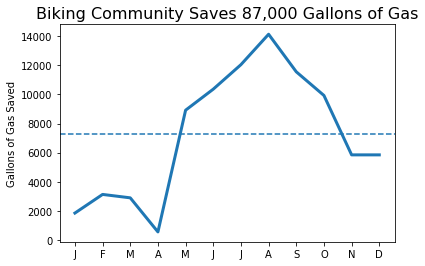

In [111]:
plt.plot(Savings_month, linewidth = 3)
plt.ylabel('Gallons of Gas Saved')
plt.xticks(np.arange(12), ('J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'))
plt.axhline(np.mean(Savings_month), linestyle='dashed')
plt.title('Biking Community Saves 87,000 Gallons of Gas', fontsize = 16)


In [19]:
#Number of trips over the course of the year
dfjan['tripduration'].count()+dffeb['tripduration'].count()+dfmarch['tripduration'].count()+dfapril['tripduration'].count()+dfmay['tripduration'].count()+dfjune['tripduration'].count()+dfjuly['tripduration'].count()+dfaug['tripduration'].count()+dfsept['tripduration'].count()+dfoct['tripduration'].count()+dfnov['tripduration'].count()+dfdec['tripduration'].count()

1807264

In [80]:
Trips_per_month = {
    "January" : dfjan['tripduration'].count(),
    "February" : dffeb['tripduration'].count(),
    "March" : dfmarch['tripduration'].count(),
    "April" : dfapril['tripduration'].count(),
    "May" : dfmay['tripduration'].count(),
    "June" : dfjune['tripduration'].count(),
    "July" : dfjuly['tripduration'].count(),
    "August" : dfaug['tripduration'].count(),
    "September" : dfsept['tripduration'].count(),
    "October" : dfoct['tripduration'].count(),
    "November" : dfnov['tripduration'].count(),
    "December" : dfdec['tripduration'].count(),
}
print (Trips_per_month)

[40932, 62817, 62985, 98194, 178865, 205359, 242916, 236076, 236182, 200100, 121419, 121419]


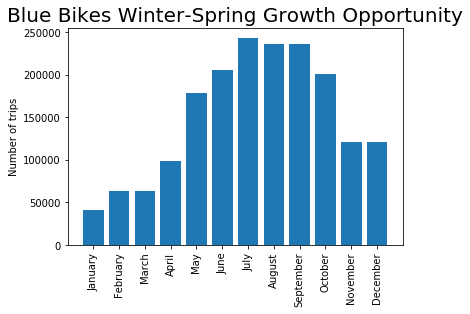

In [61]:
#create bar chart using dictionary
plt.bar(range(len(Trips_per_month)), list(Trips_per_month.values()), align='center')
plt.xticks(range(len(Trips_per_month)), list(Trips_per_month.keys()), rotation = 'vertical')
plt.title('Blue Bikes Winter-Spring Growth Opportunity', fontsize = 20)
plt.ylabel('Number of trips')
plt.show()

In [29]:
#Does the trip length data have errors?
Trip_length = {
    "January" : (dfjan['tripduration'].mean())/60,
    "February" : (dffeb['tripduration'].mean())/60,
    "March" : (dfmarch['tripduration'].mean())/60,
    "April" : (dfapril['tripduration'].mean())/60,
    "May" : (dfmay['tripduration'].mean())/60,
    "June" : (dfjune['tripduration'].mean())/60,
    "July" : (dfjuly['tripduration'].mean())/60,
    "August" : (dfaug['tripduration'].mean())/60,
    "September" : (dfsept['tripduration'].mean())/60,
    "October" : (dfoct['tripduration'].mean())/60,
    "November" : (dfnov['tripduration'].mean())/60,
    "December" : (dfdec['tripduration'].mean())/60,
}
print (Trip_length)

{'January': 14.421615524935666, 'February': 16.35644968718659, 'March': 14.802736895027916, 'April': 17.848706472221654, 'May': 26.03630736402687, 'June': 28.700219453087847, 'July': 32.45914829268828, 'August': 31.84345606217207, 'September': 24.50712988288693, 'October': 33.60113326669998, 'November': 20.577400434308743, 'December': 20.577400434308743}


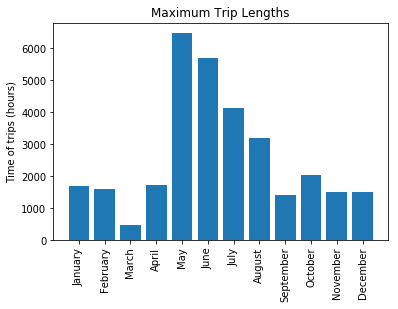

In [46]:
#Number of hours for these max rentals doesn't make sense and is skewing the data
Trip_max = {
    "January" : ((dfjan['tripduration'].max())/60)/24,
    "February" : ((dffeb['tripduration'].max())/60)/24,
    "March" : ((dfmarch['tripduration'].max())/60)/24,
    "April" : ((dfapril['tripduration'].max())/60)/24,
    "May" : ((dfmay['tripduration'].max())/60)/24,
    "June" : ((dfjune['tripduration'].max())/60)/24,
    "July" : ((dfjuly['tripduration'].max())/60)/24,
    "August" : ((dfaug['tripduration'].max())/60)/24,
    "September" : ((dfsept['tripduration'].max())/60)/24,
    "October" : ((dfoct['tripduration'].max())/60)/24,
    "November" : ((dfnov['tripduration'].max())/60)/24,
    "December" : ((dfdec['tripduration'].max())/60)/24,
}
plt.bar(range(len(Trip_max)), list(Trip_max.values()), align='center')
plt.xticks(range(len(Trip_max)), list(Trip_max.keys()), rotation = 'vertical')
plt.title('Maximum Trip Lengths')
plt.ylabel('Time of trips (hours)')
plt.show()  

In [ ]:
#Due to what seems to be a very skewed dataset, I cannot use the trip durations until that data is cleaned.